In [12]:
# Load modules

import numpy as np
import matplotlib.pyplot as plt

In [13]:
### Load in data from SPICE kernels, data loaded in has units km and km/s
# data paths
juice_callisto_data_path = "../spice_data/juice_wrt_callisto_C1.csv"
juice_jupiter_data_path = "../spice_data/juice_wrt_jupiter_C1.csv"
callisto_jupiter_data_path = "../spice_data/callisto_wrt_jupiter_mag_C1.csv"

# juice to callisto
juice_wrt_callisto = np.loadtxt(
    juice_callisto_data_path, delimiter=",", unpack=True
)
juice_wrt_callisto = juice_wrt_callisto.transpose()
Xjc, Yjc, Zjc, vxjc, vyjc, vzjc, t = juice_wrt_callisto

# juice to jupiter
juice_wrt_jupiter = np.loadtxt(
    juice_jupiter_data_path, delimiter=",", unpack=True
)
juice_wrt_jupiter = juice_wrt_jupiter.transpose()
Xjj, Yjj, Zjj, vxjj, vyjj, vzjj, _ = juice_wrt_jupiter

# callisto to jupiter
callisto_wrt_jupiter = np.loadtxt(
    callisto_jupiter_data_path, delimiter=",", unpack=True
)
callisto_wrt_jupiter = callisto_wrt_jupiter.transpose()
Xcj, Ycj, Zcj, vxcj, vycj, vzcj, _ = callisto_wrt_jupiter

# convert positions to m
juice_wrt_callisto = 1e3 * np.array([Xjc, Yjc, Zjc]).transpose()
juice_wrt_jupiter = 1e3 * np.array([Xjj, Yjj, Zjj]).transpose()
callisto_wrt_jupiter = 1e3 * np.array([Xcj, Ycj, Zcj]).transpose()

# set initial time to zero
t = t - t[0]

# induced field parameters
rm = 2410300  # Callisto radius in m

In [14]:
# Define a function to add a circle to a plot

def add_callisto_circle(ax):
    callisto = plt.Circle((0, 0), 1, color='black')
    ax.add_patch(callisto)
    return ax

In [15]:
x = juice_wrt_callisto[:, 0] / rm
y = juice_wrt_callisto[:, 1] / rm
z = juice_wrt_callisto[:, 2] / rm

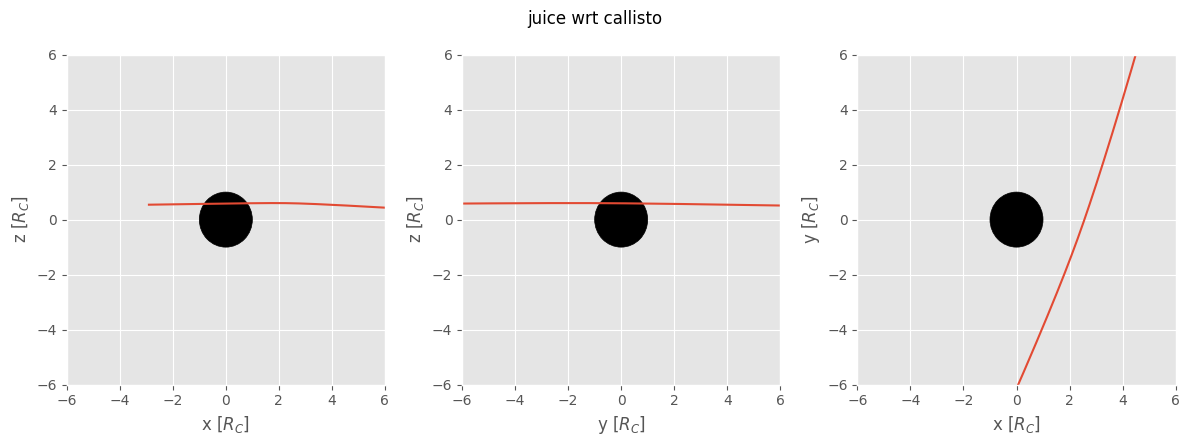

In [16]:
# Define the common x and y limits for all subplots
common_xlim = (-6, 6)
common_ylim = (-6, 6)

plt.style.use('ggplot')
fig, axes = plt.subplots(1, 3, figsize=(12, 4.5))

# Add the Callisto circle to each subplot using the function
for i in range(3):
    axes[i] = add_callisto_circle(axes[i])

    # Apply the common limits to all subplots
    axes[i].set_xlim(common_xlim)
    axes[i].set_ylim(common_ylim)

# First subplot: x against z
axes[0].plot(x,z)
axes[0].set_xlabel('x [$R_C$]')
axes[0].set_ylabel('z [$R_C$]')

# Second subplot: y against z
axes[1].plot(y,z)
axes[1].set_xlabel('y [$R_C$]')
axes[1].set_ylabel('z [$R_C$]')

# Third subplot: x against y
axes[2].plot(x,y)
axes[2].set_xlabel('x [$R_C$]')
axes[2].set_ylabel('y [$R_C$]')

plt.suptitle("juice wrt callisto")
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


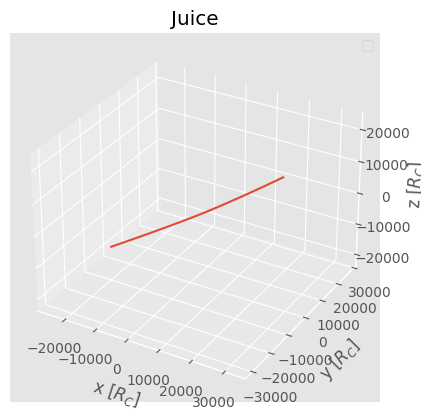

In [17]:
# Plot Galileo Trajectory

plt.style.use('ggplot')
ax = plt.figure().add_subplot(projection='3d')
#ax = add_callisto_circle(ax)


# Plot the data
orbit = ax.plot(Xjc, Yjc, Zjc)


# Plot the Callisto surface
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x_c = np.outer(np.cos(u), np.sin(v))
y_c = np.outer(np.sin(u), np.sin(v))
z_c = np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(x_c, y_c, z_c, color="black")

# Set an equal aspect ratio
ax.set_aspect('equal')


# Set the labels
ax.set_xlabel('x [$R_C$]')
ax.set_ylabel('y [$R_C$]')
ax.set_zlabel('z [$R_C$]')


plt.title('Juice')
plt.legend()
plt.show()
